In [4]:
import os
import pandas as pd
import env
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from env import user, password, host
database_url_base = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/'

In [ ]:
def get_superstore_data(use_cache=True):
    '''
The query below is used to join 4 tables from the superstore dataset 
in the Codeup SQL Cloud Database.  The tables joined are:orders, 
categories and regions, products. Rename the columns, added year and month column
'''
    if os.path.exists('superstore.csv') and use_cache:
        print('Using cached csv')
        df = pd.read_csv('superstore.csv')
        df = df.rename(columns={'Order Date': 'order_date',
                       'Region ID': "region_id",
                       'Category ID': "category_id",
                       'Ship Date': 'ship_date',
                       'Ship Mode': 'ship_mode',
                        'Customer ID':'customer_id',
                        'Postal Code':'postal_code',
                        'Product ID':'product_id',
                        'Order ID':'order_id',
                         'Product Name': 'product_name'
                         })
        df.columns= df.columns.str.lower()
        df.order_date = pd.to_datetime(df.order_date)
        df['year'] = pd.DatetimeIndex(df['order_date']).year
        df['month'] = pd.DatetimeIndex(df['order_date']).month
       
        return df
    
    
    print('Acquiring data from SQL database')
    query = '''
          SELECT * FROM orders
           LEFT OUTER JOIN categories USING (`Category ID`)
            LEFT OUTER JOIN regions USING(`Region ID`)
            LEFT OUTER JOIN products USING(`Product ID`);
    '''
    df = pd.read_sql(query, database_url_base + 'superstore_db')
  
    df.to_csv('superstore.csv', index=False)
   
    return df

Along the way, we'll analyze the overall sales volume and profit, display the list of regional sales, find out the top ten commodities in sales volume, sales volume and profit, and draw the proportion chart of different types of customers.

How much did by year the store make and sell between 2011 and 2014?
How much did by month the store make and sell between 2011 and 2014?
Which was the most profitable category, and which sold the most?
Which was the most profitable sub-category, and which sold the most?
Which was the most profitable segment, and which sold the most?
Which country bought the most, and which made the most profit?
Which country bought the less, and which made the less profit? There was negative profit?

A company’s market share is the percentage it controls of the total market for its products and services. Market share is an essential metric for businesses because it’s an indicator of a company’s profitability and success.

Gaining market share should be one of management’s primary goals because of its effect on operations and profitability.

The enormous benefits of market share underscore the importance of the strategies that can increase it.


Increasing your market share means increasing the number of sales. With more sales overall, economies of scale may mean that selling more of your products or services will allow you to save money per sale. For example, you may get better prices on the materials you use if you purchase larger quantities of them.

If a business is looking to increase market share one of the most common ways to do so is through innovation. Innovation is easily one of the top ways to increase market share. Whenever a company brings brand new technology or a new product to an industry, they have a value add that their competition doesn’t. 

In [82]:

df = get_superstore_data()

Using cached csv


In [1]:
import wrangle
df= wrangle.wrangle_superstore()

Saving to .csv


In [6]:
df.isnull().sum()

order_id           0
ship_date          0
shipping_method    0
customer_id        0
segment            0
country            0
city               0
state              0
zip_code           0
product id         0
sales              0
quantity           0
discount           0
profit             0
category_id        0
region_id          0
product name       0
category           0
sub_category       0
region_name        0
year               0
month              0
dtype: int64

In [12]:
df

,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,sales,quantity,discount,profit,category_id,region_id,product name,category,sub_category,region_name
order_date,,,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-LA-10003223,11.784,3.0,0.2,4.2717,3,3,Avery 508,Office Supplies,Labels,Central
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-BI-10004094,3.540,2.0,0.8,-5.4870,9,3,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-ST-10002743,272.736,3.0,0.2,-64.7748,5,3,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,MS-17830,Consumer,United States,Laredo,Texas,78041.0,TEC-AC-10001266,31.200,3.0,0.2,9.7500,12,3,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,MS-17830,Consumer,United States,Laredo,Texas,78041.0,OFF-AR-10004078,9.344,2.0,0.2,1.1680,7,3,Newell 312,Office Supplies,Art,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,CA-2017-115427,2018-01-03,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533.0,OFF-BI-10002103,13.904,2.0,0.2,4.5188,9,2,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",Office Supplies,Binders,West
2017-12-30,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009.0,TEC-PH-10004774,90.930,7.0,0.0,2.7279,8,4,Gear Head AU3700S Headset,Technology,Phones,East
2017-12-30,CA-2017-115427,2018-01-03,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533.0,OFF-BI-10004632,20.720,2.0,0.2,6.4750,9,2,Ibico Hi-Tech Manual Binding System,Office Supplies,Binders,West


## Sales and Profit value every year? 

In [5]:
year_profit_sales=pd.pivot_table(data=df[['year','profit','sales']], 
                        index=['year'], 
                        values=['profit','sales'],
                        aggfunc='sum')
year_profit_sales

,profit,sales
year,,
2014,10041.2325,101075.5685
2015,10006.7669,92552.7542
2016,11225.3949,106836.2096
2017,6667.1350,96979.2931


<AxesSubplot:title={'center':'Year_performance'}, xlabel='category', ylabel='Maximum Sales'>

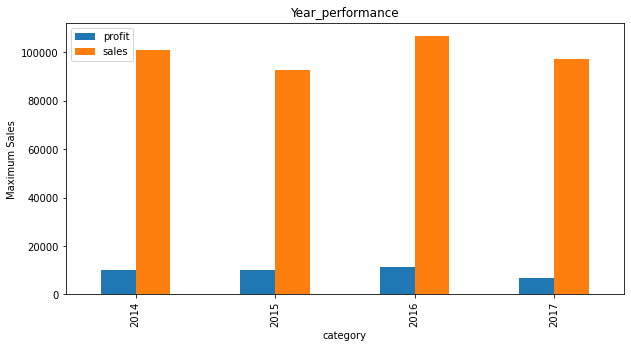

In [133]:
year_profit_sales.plot(kind='bar', title='Year_performance', ylabel='Maximum Sales',
         xlabel='category', figsize=(10, 5))

## Sales Increase % from last year.

In [63]:
df = df.set_index('order_date').sort_index()

In [42]:
by_date = df.groupby(['order_date']).sales.sum().reset_index()

In [44]:
by_date

,order_date,sales
0,2014-01-04,288.0600
1,2014-01-09,40.5440
2,2014-01-10,54.8300
3,2014-01-11,9.9400
4,2014-01-13,1287.2600
...,...,...
565,2017-12-24,53.7900
566,2017-12-25,233.9440
567,2017-12-26,44.7500
568,2017-12-28,966.3848


<AxesSubplot:xlabel='order_date'>

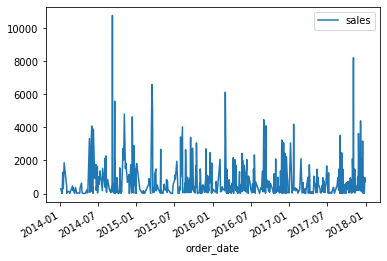

In [43]:
by_date.plot(x='order_date', y='sales')

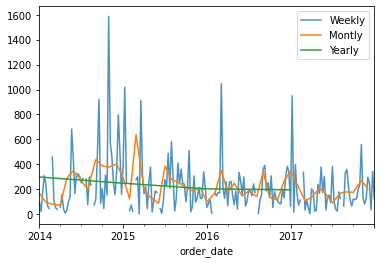

In [68]:
df.sales.resample('W').mean().plot(alpha=.8, label='Weekly')
df.sales.resample('M').mean().plot(label='Montly')
df.sales.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [9]:
performance = df.groupby('year', as_index=False).agg({'sales': sum,
                                                         'profit': sum,
                                                         })

In [12]:
performance

,year,sales,profit
0,2014,101075.5685,10041.2325
1,2015,92552.7542,10006.7669
2,2016,106836.2096,11225.3949
3,2017,96979.2931,6667.1350


In [13]:
performance.pct_change()

,year,sales,profit
0,NaN,NaN,NaN
1,0.000497,-0.084321,-0.003432
2,0.000496,0.154328,0.121780
3,0.000496,-0.092262,-0.406067


***Overall sales are not increased much.***

## Which product give us the maximum profit?

In [77]:
df_Category_profit = pd.pivot_table(data=df[['category','sub-category','profit','sales']], 
                        index=['category','sub-category'], 
                        values=['profit','sales'],
                        aggfunc='sum')

df_Category_profit

profit       sales
category        sub-category                       
Furniture       Bookcases    -2267.7776  20280.1429
                Chairs        4306.3499  54409.2150
                Furnishings   2124.3447  16442.0180
                Tables       -4786.1621  48444.2095
Office Supplies Appliances    2776.4985  17415.0360
                Art           1336.4246   6346.8080
                Binders       4062.6403  28108.2820
                Envelopes     1394.5297   3349.8260
                Fasteners      215.6470    632.6640
                Labels        1544.5261   3415.5860
                Paper         5464.4993  12671.9140
                Storage       2771.6621  37373.6200
                Supplies      -253.9979   3109.9440
Technology      Accessories   7786.3621  30675.6040
                Copiers       5598.3914  14509.7220
                Machines      -680.6722  44215.5200
                Phones        6547.2634  56043.7140

<AxesSubplot:title={'center':'Category vs Maximum Sales'}, xlabel='category', ylabel='Maximum Sales'>

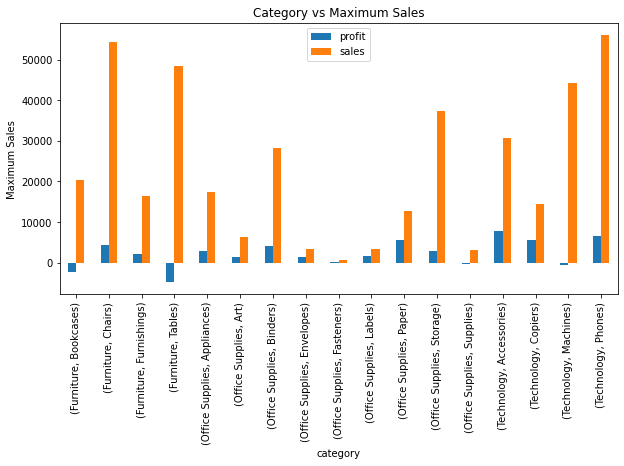

In [78]:

df_Category_profit.plot(kind='bar', title='Category vs Maximum Sales', ylabel='Maximum Sales',
         xlabel='category', figsize=(10, 5))

In [107]:
df.groupby('sub-category').sum()['profit'].head(8)

sub-category
Accessories    7786.3621
Appliances     2776.4985
Art            1336.4246
Binders        4062.6403
Bookcases     -2267.7776
Chairs         4306.3499
Copiers        5598.3914
Envelopes      1394.5297
Name: profit, dtype: float64

In [108]:
df.groupby('sub-category').sum()['sales'].head(8)

sub-category
Accessories    30675.6040
Appliances     17415.0360
Art             6346.8080
Binders        28108.2820
Bookcases      20280.1429
Chairs         54409.2150
Copiers        14509.7220
Envelopes       3349.8260
Name: sales, dtype: float64

## From which state do we get maximum profit and sales volumn?

In [95]:
#Lets see State vs Maximum Profit
state_profit_df = pd.pivot_table(data=df[['state','profit','sales']], 
                        index=['state'], 
                        values=['profit','sales'],
                        aggfunc='sum')

state_profit_df.sort_values(by='profit', ascending=False).head()

,profit,sales
state,,
New York,13782.5569,60810.6160
California,11028.5963,68103.3185
Washington,6180.3892,21165.9340
Georgia,4807.5942,11903.4800
Michigan,4335.9916,17074.6880


<AxesSubplot:title={'center':'State vs Maximum Profit'}, xlabel='State', ylabel='Maximum Profit'>

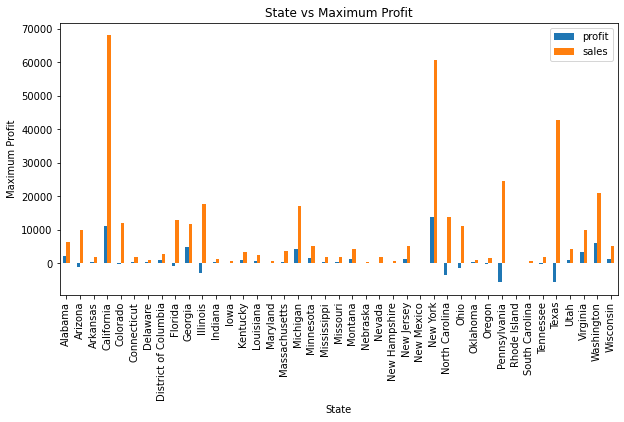

In [73]:
state_profit_df.plot(kind='bar', title='State vs Maximum Profit', ylabel='Maximum Profit',
         xlabel='State', figsize=(10, 5))

In [97]:
df.groupby(by='state').sum().sort_values('sales',ascending=False).head(5)

,region_id,category_id,postal_code,sales,quantity,discount,profit,year,month
state,,,,,,,,,
California,652,2607,30039063.0,68103.3185,1258.0,23.60,11028.5963,657085,2647
New York,960,1890,2519561.0,60810.6160,925.0,13.90,13782.5569,483808,1971
Texas,501,1392,12810819.0,42798.5034,633.0,59.48,-5692.7992,336627,1326
Pennsylvania,548,1151,2616594.0,24613.6000,507.0,45.80,-5561.4145,276130,1025
Washington,164,679,8048417.0,21165.9340,296.0,5.20,6180.3892,165286,656


## What happen to 2017 Nov? 

In [15]:
df['month'] = pd.DatetimeIndex(df['order_date']).month

In [31]:
nov_2017 = df[(df['month'] == 11) & (df['year'] == 2017)]

In [32]:
pd.pivot_table(data=nov_2017[['category','sub-category','discount','profit','sales']], 
                        index=['category','sub-category','discount'], 
                        values=['profit','sales'],
                        aggfunc='sum')

profit     sales
category        sub-category discount                     
Furniture       Chairs       0.1        436.1308  2220.192
                             0.2        -91.0980  1527.840
                Furnishings  0.0        130.8622   349.500
                             0.2         63.6297  1539.712
                             0.6        -13.9930    15.992
                Tables       0.4       -619.5960  2065.320
                             0.5       -131.4450   219.075
Office Supplies Appliances   0.2         14.6510   167.440
                             0.8        -24.7086     9.324
                Art          0.0         50.7070   174.460
                             0.2         14.2401   155.136
                Binders      0.0        138.2016   287.920
                             0.2         75.7133   226.816
                             0.7        -34.0076    50.106
                             0.8        -32.0880    18.336
                Envelopes    0.0          7.4872    15.280
                Fasteners    0.0          1.4208     2.960
                             0.2          2.5707    10.824
                Labels       0.0          5.6994    12.390
                             0.2         12.2730    34.120
                Paper        0.0         82.6124   175.440
                             0.2         97.4301   306.568
                Storage      0.0        110.8852   485.680
                             0.2        -65.7101  1014.416
                Supplies     0.2          0.5004     6.672
Technology      Accessories  0.0        176.9573   474.280
                             0.2        -18.3912   314.064
                Machines     0.5      -3839.9904  7999.980
                             0.7        -63.9960    95.994
                Phones       0.2         19.6158   261.544
                             0.4        -24.4792   340.692

***Looks like we didn't sell any copiers in 2017 Nov***
***Machines are taking too much discount*** 

## Overall Q4 Sales for the past three years. 

In [89]:
oct_nov_dec = df[(df['month'] == 11) | (df['month'] == 12)|(df['month'] == 10)]
oct_nov_dec

,product_id,region_id,category_id,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,...,sales,quantity,discount,profit,category,sub-category,region name,product_name,year,month
0,FUR-BO-10001798,1,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,...,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,South,Bush Somerset Collection Bookcase,2016,11
1,FUR-CH-10000454,1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,...,731.9400,3.0,0.00,219.5820,Furniture,Chairs,South,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2016,11
3,FUR-TA-10000577,1,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,...,957.5775,5.0,0.45,-383.0310,Furniture,Tables,South,Bretford CR4500 Series Slim Rectangular Table,2015,10
4,OFF-ST-10000760,1,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,...,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,South,Eldon Fold 'N Roll Cart System,2015,10
13,OFF-BI-10003656,2,9,CA-2016-161389,2016-12-05,2016-12-10,Standard Class,IM-15070,Consumer,United States,...,407.9760,3.0,0.20,132.5922,Office Supplies,Binders,West,Fellowes PB200 Plastic Comb Binding Machine,2016,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,TEC-AC-10000736,3,12,US-2015-123218,2015-12-20,2015-12-25,Standard Class,KD-16345,Consumer,United States,...,255.9680,4.0,0.20,51.1936,Technology,Accessories,Central,Logitech G600 MMO Gaming Mouse,2015,12
1723,FUR-BO-10003966,3,1,US-2015-123218,2015-12-20,2015-12-25,Standard Class,KD-16345,Consumer,United States,...,359.0580,3.0,0.30,-71.8116,Furniture,Bookcases,Central,"Sauder Facets Collection Library, Sky Alder Fi...",2015,12
1724,OFF-AP-10000828,4,10,CA-2015-127453,2015-12-19,2015-12-20,First Class,JK-15370,Consumer,United States,...,434.3520,3.0,0.20,43.4352,Office Supplies,Appliances,East,Avanti 4.4 Cu. Ft. Refrigerator,2015,12
1725,OFF-AP-10002906,4,10,CA-2015-127453,2015-12-19,2015-12-20,First Class,JK-15370,Consumer,United States,...,3.5520,2.0,0.20,0.4440,Office Supplies,Appliances,East,Hoover Replacement Belt for Commercial Guardsm...,2015,12


In [90]:
oct_nov_dec = nov_dec.groupby('year', as_index=False).agg({'sales': sum,
                                                         'profit': sum,
                                                         

                                                         })

In [91]:
oct_nov_dec

,year,sales,profit
0,2014,36294.9195,5237.9934
1,2015,30874.6652,1723.0218
2,2016,31531.1040,6097.0994
3,2017,46935.7698,112.6743


In [92]:
oct_nov_dec.pct_change()

,year,sales,profit
0,NaN,NaN,NaN
1,0.000497,-0.149339,-0.671053
2,0.000496,0.021261,2.538608
3,0.000496,0.488555,-0.981520


***Sales in Q4 keep increasing for two years.***

## 2017 Q4 performance

In [75]:
oct_nov_dec_2017 = df[((df['month'] == 11) | (df['month'] == 12) | (df['month'] == 10))& (df['year'] == 2017)]

In [76]:
pd.pivot_table(data=oct_nov_dec_2017[['category','sub-category','discount','profit','sales']], 
                        index=['category','sub-category','discount'], 
                        values=['profit','sales'],
                        aggfunc='sum')

profit      sales
category        sub-category discount                      
Furniture       Bookcases    0.15         4.2882  1764.3280
                             0.20        16.9172   515.1200
                             0.32       -11.5960    78.8528
                Chairs       0.00       226.9644   872.9400
                             0.10       575.7010  3362.1300
                             0.20       -67.7057  2848.5040
                             0.30       -27.2840   318.2900
                Furnishings  0.00       426.0018  1272.1800
                             0.20        92.0865  1896.2880
                             0.60       -19.8178    25.7000
                Tables       0.00       116.8720  1669.6000
                             0.20      -112.9527  1004.0240
                             0.40      -695.4264  2349.6840
                             0.50      -604.7148   938.1700
Office Supplies Appliances   0.00      1323.0513  4552.7600
                             0.20        18.1556   198.5920
                             0.80      -203.6754    75.6080
                Art          0.00       134.7135   407.2700
                             0.20        26.7015   312.2320
                Binders      0.00       289.7814   613.6200
                             0.20       290.6189   861.6720
                             0.70       -38.7557    56.8890
                             0.80       -34.0224    19.5840
                Envelopes    0.00         7.4872    15.2800
                             0.20        21.5910    57.5760
                Fasteners    0.00        24.0523    69.2100
                             0.20         2.5707    10.8240
                Labels       0.00        77.6544   163.2100
                             0.20        20.9670    58.9600
                Paper        0.00       289.9117   609.6000
                             0.20       131.9049   410.7280
                Storage      0.00       653.8787  2996.5200
                             0.20         2.0843  1803.9840
                Supplies     0.20         0.5004     6.6720
Technology      Accessories  0.00       340.4027   953.9400
                             0.20       -15.0187   328.2640
                Copiers      0.20       434.9913  1199.9760
                Machines     0.50     -3839.9904  7999.9800
                             0.70       -63.9960    95.9940
                Phones       0.00        45.5906   398.6900
                             0.20       333.4246  3092.0560
                             0.40       -81.2348   650.2680

## 7 Days Sales Volume 

<AxesSubplot:xlabel='weekday'>

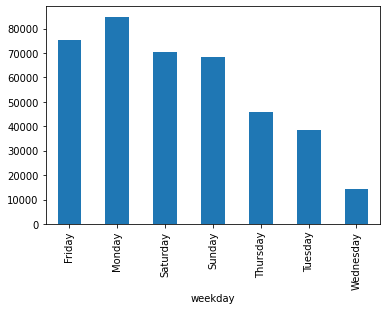

In [49]:

df['weekday'] = df.order_date.dt.day_name()
df.groupby('weekday').sales.sum().plot.bar()

<AxesSubplot:xlabel='weekday'>

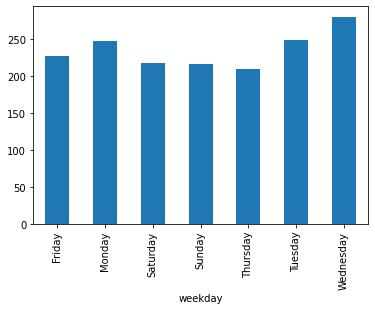

In [53]:
df.groupby('weekday').sales.mean().plot.bar()

In [55]:
df.order_date = pd.DatetimeIndex(df['order_date'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   region_id     1734 non-null   int64         
 1   category_id   1734 non-null   int64         
 2   order_id      1734 non-null   object        
 3   order_date    1734 non-null   datetime64[ns]
 4   ship_date     1734 non-null   object        
 5   ship_mode     1734 non-null   object        
 6   customer_id   1734 non-null   object        
 7   segment       1734 non-null   object        
 8   country       1734 non-null   object        
 9   city          1734 non-null   object        
 10  state         1734 non-null   object        
 11  postal_code   1734 non-null   float64       
 12  product_id    1734 non-null   object        
 13  sales         1734 non-null   float64       
 14  quantity      1734 non-null   float64       
 15  discount      1734 non-null   float64 

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='order_date'>

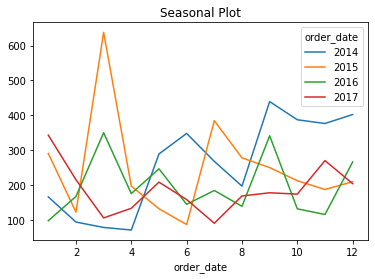

In [69]:
# .unstack turns an index level into columns
df.sales.groupby([df.index.year, df.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

In [13]:
pd.pivot_table(data=df[['category','sub_category','discount','quantity','profit','sales']], 
                        index=['category','sub_category','quantity'], 
                        values=['profit','sales'],
                        aggfunc='sum')

profit      sales
category   sub_category quantity                     
Furniture  Bookcases    1.0        -9.6082   240.3030
                        2.0        96.1702  2065.0506
                        3.0       149.4366  3724.1037
                        4.0       109.7960  5427.6416
                        5.0      -385.0580  1850.5350
...                                    ...        ...
Technology Phones       8.0       229.1032  2291.0080
                        9.0        -9.4437  2708.8740
                        10.0       15.9920   119.9400
                        11.0      103.8015   384.4500
                        12.0      133.6608  1185.4320

[170 rows x 2 columns]